In [ ]:
https://drive.google.com/file/d/1SXmu5QcTFPGyxxqrAyYIEx2N0h5PGLob/view?usp=drive_link

In [ ]:
!gdown 1SXmu5QcTFPGyxxqrAyYIEx2N0h5PGLob

Downloading...
From (original): https://drive.google.com/uc?id=1SXmu5QcTFPGyxxqrAyYIEx2N0h5PGLob
From (redirected): https://drive.google.com/uc?id=1SXmu5QcTFPGyxxqrAyYIEx2N0h5PGLob&confirm=t&uuid=0f7dde33-8b52-43f8-8d6d-8d09600a04a4
To: /content/122.mat
100% 3.92M/3.92M [00:00<00:00, 107MB/s]


#سوال 3 I

## قسمت آ

خواندن فایل

In [ ]:
pip install scipy

خواندن فایل متلب
و قسمت های درون آن




In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

filename = '122.mat'

# 2. Use scipy.io.loadmat to read the .mat file.
mat_data = scipy.io.loadmat(filename)

# 3. Display the keys in the mat_data dictionary.
print("Keys in mat_data:")
print(mat_data.keys())

Keys in mat_data:
dict_keys(['__header__', '__version__', '__globals__', 'X122_DE_time', 'X122_FE_time', 'X122RPM'])


مشخص کردن نوع داده و ابعاد سیگنال های درون آن




In [ ]:
import scipy.io

mat_data = scipy.io.loadmat('122.mat')

for key in mat_data:
    if not key.startswith('__'):  # ignore __header__, __version__, __globals__
        val = mat_data[key]
        print(f"{key}: type={type(val)}, shape={val.shape}, dtype={val.dtype}")

X122_DE_time: type=<class 'numpy.ndarray'>, shape=(244739, 1), dtype=float64
X122_FE_time: type=<class 'numpy.ndarray'>, shape=(244739, 1), dtype=float64
X122RPM: type=<class 'numpy.ndarray'>, shape=(1, 1), dtype=uint16


##قسمت ب






X122_DE_timeنمایش سیگنال





نمایش سیگنال در زمان 2 تا 2.01  ثانیه

244739
[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 5.09866667e+00
 5.09868750e+00 5.09870833e+00]


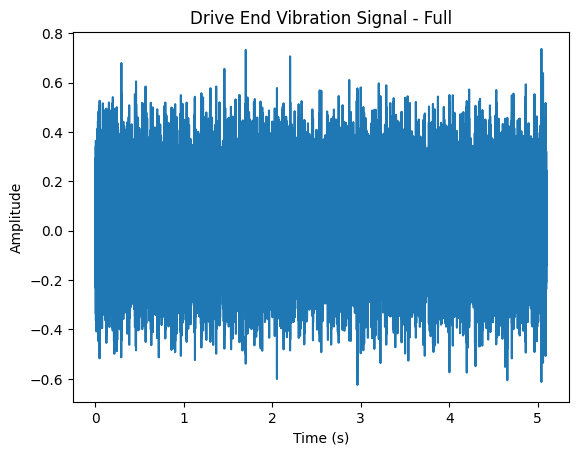

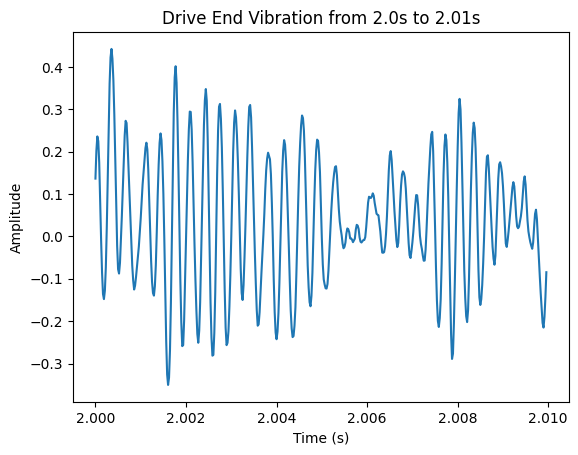

In [ ]:
DE_raw = mat_data['X122_DE_time']
DE_signal = np.squeeze(DE_raw)

# Define sampling frequency
Fs = 48000.0  # 48 kHz

# 4. Create a time array for the entire signal
N = len(DE_signal)
print(N)
time_array = np.arange(N) / Fs  # in seconds
print(time_array)

# . Plot the full signal
plt.figure()
plt.plot(time_array, DE_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Drive End Vibration Signal - Full")
plt.show()

# . Plot from 2s to 2.01s
start_time = 2.0
end_time   = 2.01

# Convert time to sample indices
start_index = int(start_time * Fs)
end_index   = int(end_time * Fs)

time_slice = time_array[start_index:end_index]
signal_slice = DE_signal[start_index:end_index]

plt.figure()
plt.plot(time_slice, signal_slice)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Drive End Vibration from {start_time}s to {end_time}s")
plt.show()


## قسمت ج





طیف فرکانسی سیگنال




فرکانس غالب

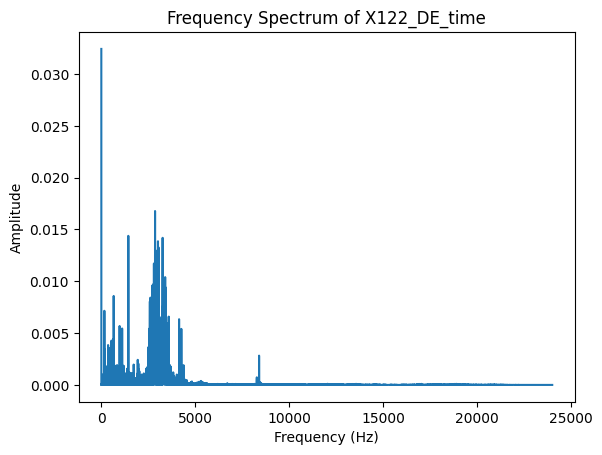

Dominant Frequency is approximately 0.0 Hz


In [ ]:
def plot_frequency_spectrum(signal, fs, title="Frequency Spectrum"):

    # Number of samples
    N = len(signal)

    # Compute the Fourier Transform for a real-valued input (one-sided spectrum)
    fft_values = np.fft.rfft(signal)

    # Generate the frequency axis for the one-sided spectrum
    freq_axis = np.fft.rfftfreq(N, d=1/fs)

    # Compute the amplitude (magnitude) and normalize by the number of samples
    amplitude_spectrum = np.abs(fft_values) / N

    # Plot the frequency spectrum
    plt.figure()
    plt.plot(freq_axis, amplitude_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

    #  Find the index of the maximum amplitude
    dominant_index = np.argmax(amplitude_spectrum)

    # Use that index to get the corresponding frequency
    dominant_frequency = freq_axis[dominant_index]

    print("Dominant Frequency is approximately", dominant_frequency, "Hz")




# . Plot the Frequency Spectrum
# Use the function I defined above
plot_frequency_spectrum(DE_signal, Fs, title="Frequency Spectrum of X122_DE_time")


##  قسمت د

In [ ]:
import numpy as np

chunk_size = 128
overlap = 64

step = chunk_size - overlap
signal_length = len(DE_signal)

chunks = []
start = 0

while (start + chunk_size) <= signal_length:
    # Extract a slice from start to start+chunk_size
    chunk = DE_signal[start : start + chunk_size]
    chunks.append(chunk)

    # Move the start index forward by 'step'
    start += step

# Convert list of 1D arrays into a 2D NumPy array
# Result shape will be (#chunks, chunk_size)
chunks_array = np.stack(chunks, axis=0)

print("Number of chunks:", chunks_array.shape[0])
print("Chunk size:", chunks_array.shape[1])
print("chunks_array shape:", chunks_array.shape)



Number of chunks: 3823
Chunk size: 128
chunks_array shape: (3823, 128)


##قسمت ه

df_chunks shape: (3823, 128)
df_m13 shape: (10, 128)


<Figure size 1200x600 with 0 Axes>

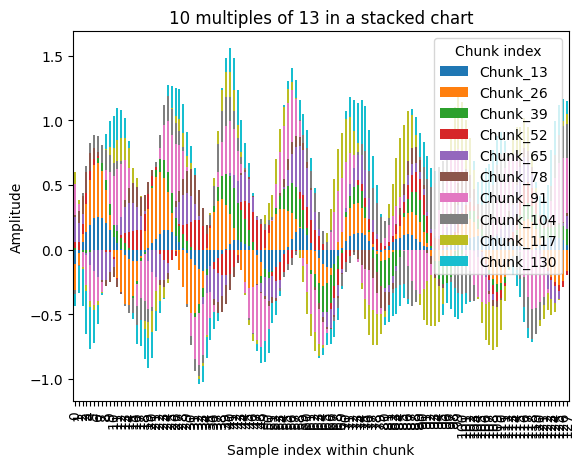

In [ ]:


# Create a DataFrame where each row is one chunk
df_chunks = pd.DataFrame(np.stack(chunks, axis=0))
print("df_chunks shape:", df_chunks.shape)  # e.g. (3816, 128)

#  Select 10 multiples of 13 in a for loop
#    and build a new DataFrame

df_m13_list = []  # will store each selected row as a small DataFrame
for i in range(1, 11):  # i goes from 1 to 10
    idx = i * 13
    if idx < len(df_chunks):
        # iloc[[idx]] gives a one-row DataFrame instead of a Series
        row_df = df_chunks.iloc[[idx]]
        df_m13_list.append(row_df)

# Concatenate all selected rows into one DataFrame
df_m13 = pd.concat(df_m13_list, ignore_index=True)
print("df_m13 shape:", df_m13.shape)  # should be (10, 128) if 10 valid chunks found

# Plot these 10 rows in a stacked bar chart

df_m13_t = df_m13.T  # now shape is (128, 10)

# Rename the columns for a readable legend
df_m13_t.columns = [f"Chunk_{(i+1)*13}" for i in range(len(df_m13))]

# Stacked bar chart
plt.figure(figsize=(12, 6))
df_m13_t.plot(kind='bar', stacked=True)
plt.title("10 multiples of 13 in a stacked chart")
plt.xlabel("Sample index within chunk")
plt.ylabel("Amplitude")
plt.legend(loc="upper right", title="Chunk index")
plt.show()


## قسمت و

In [39]:
import scipy.io
import numpy as np
import pandas as pd

def calculate_features(signal):
    """
    Computes the mean, standard deviation,
    and root mean square (RMS) of a 1D NumPy array.
    """
    mean_val = np.mean(signal)
    std_val  = np.std(signal)
    rms_val  = np.sqrt(np.mean(signal**2))
    return mean_val, std_val, rms_val

# 1. Load the .mat file and extract the DE signal
filename = '122.mat'  # Change if your file has a different name
mat_data = scipy.io.loadmat(filename)
DE_signal = np.squeeze(mat_data['X122_DE_time'])  # Convert (N,1) to shape (N,)

# 2. Calculate the three features for the *entire* signal
mean_val, std_val, rms_val = calculate_features(DE_signal)

# 3. Create a DataFrame with a single row containing these features
df_features = pd.DataFrame({
    'mean': [mean_val],
    'std': [std_val],
    'rms': [rms_val]
})

# 4. Save the DataFrame to a CSV file, without the row index
output_filename = 'X122_DE_features.csv'
df_features.to_csv(output_filename, index=False)
print(f"Features saved to {output_filename}")


Features saved to X122_DE_features.csv


دانلود فایل csv

In [41]:
import os
os.listdir()
from google.colab import files
files.download("X122_DE_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# سوال 3 II

## قسمت آ

### load iris dataset

In [44]:
# Import the load_iris function from scikit-learn
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Explore its keys
print("Keys of iris dataset:\n", iris.keys())

# Print the feature names
print("\nFeature names:\n", iris.feature_names)

# Print the target names
print("\nTarget names:\n", iris.target_names)

# Print the shape of data and target
print("\nShape of data:", iris.data.shape)
print("Shape of target:", iris.target.shape)


Keys of iris dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
 ['setosa' 'versicolor' 'virginica']

Shape of data: (150, 4)
Shape of target: (150,)


### train test split

In [45]:
from sklearn.model_selection import train_test_split

# Extract the features (X) and the target (y)
X = iris.data
y = iris.target

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% of data goes to the test set
    random_state=42   # ensures reproducible results
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (120, 4) (120,)
Test set shape: (30, 4) (30,)


### تبدیل نمونه ها به dataframe.pandas

In [47]:
#  Convert to Pandas DataFrames
# Let's use the iris feature names as column headers
column_names = iris.feature_names  # e.g. ['sepal length (cm)', 'sepal width (cm)', ...]

train_df = pd.DataFrame(X_train, columns=column_names)
train_df['target'] = y_train
train_df['dataset'] = 'train'  # New column to label these rows as training data

test_df = pd.DataFrame(X_test, columns=column_names)
test_df['target'] = y_test
test_df['dataset'] = 'test'    # New column to label these rows as test data

# Check the first few rows of the training and test DataFrames
print("Training DataFrame (first 5 rows):")
print(train_df.head())

print("\nTest DataFrame (first 5 rows):")
print(test_df.head())


Training DataFrame (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.6               3.6                1.0               0.2   
1                5.7               4.4                1.5               0.4   
2                6.7               3.1                4.4               1.4   
3                4.8               3.4                1.6               0.2   
4                4.4               3.2                1.3               0.2   

   target dataset  
0       0   train  
1       0   train  
2       1   train  
3       0   train  
4       0   train  

Test DataFrame (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.1               2.8                4.7               1.2   
1                5.7               3.8                1.7               0.3   
2                7.7               2.6                6.9               2.3   
3                6.0  

###ادغام دیتا فریم ها

In [48]:
# Merge the training and test DataFrames into a single DataFrame
combined_df = pd.concat([train_df, test_df], ignore_index=True)

print("\nCombined DataFrame (last 5 rows):")
print(combined_df.tail())


Combined DataFrame (last 5 rows):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.7               2.5                5.8               1.8   
147                6.8               3.2                5.9               2.3   
148                4.8               3.0                1.4               0.3   
149                4.8               3.1                1.6               0.2   

     target dataset  
145       2    test  
146       2    test  
147       2    test  
148       0    test  
149       0    test  


## ب

### 1. Plot of Two Chosen Features by Species

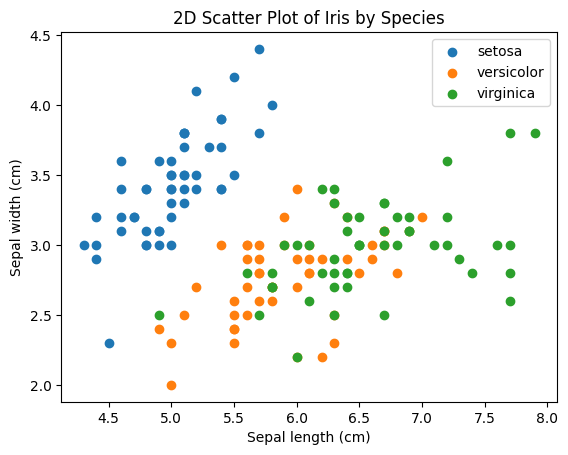

In [50]:
# We will make a 2D scatter plot:
# x-axis: sepal length (cm)   ->  feature_names[0]
# y-axis: sepal width (cm)    ->  feature_names[1]
feature_names = iris.feature_names
plt.figure()  # Create a new figure
species_labels = np.unique(combined_df["target"])

for species in species_labels:
    subset = combined_df[combined_df["target"] == species]
    plt.scatter(
        subset[feature_names[0]],
        subset[feature_names[1]],
        label=iris.target_names[species]
    )

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("2D Scatter Plot of Iris by Species")
plt.legend()
plt.show()


### 2. 3D Scatter Plot of Three Chosen Features by Species

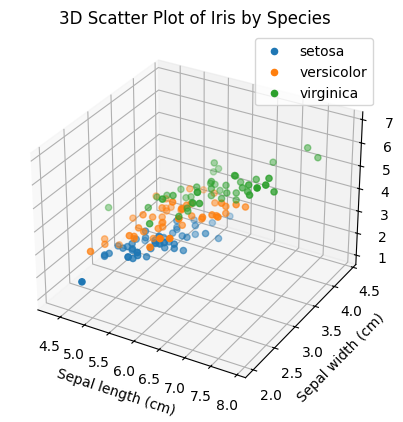

In [51]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(projection='3d')  # 3D subplot

species_labels = np.unique(combined_df["target"])
for species in species_labels:
    subset = combined_df[combined_df["target"] == species]
    ax.scatter(
        subset[feature_names[0]],
        subset[feature_names[1]],
        subset[feature_names[2]],
        label=iris.target_names[species]
    )

ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Sepal width (cm)")
ax.set_zlabel("Petal length (cm)")
ax.set_title("3D Scatter Plot of Iris by Species")
ax.legend()
plt.show()


### 3 نقشه حرارتی

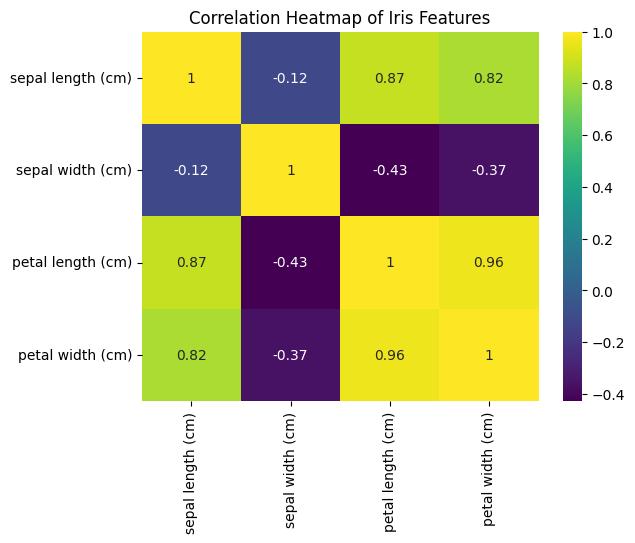

In [52]:
import seaborn as sns

plt.figure()
# Only take the four feature columns for correlation
corr_matrix = combined_df[feature_names].corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis')  # Seaborn heatmap
plt.title("Correlation Heatmap of Iris Features")
plt.show()

### 4 تابع چگالی احتمال ویژگی ها

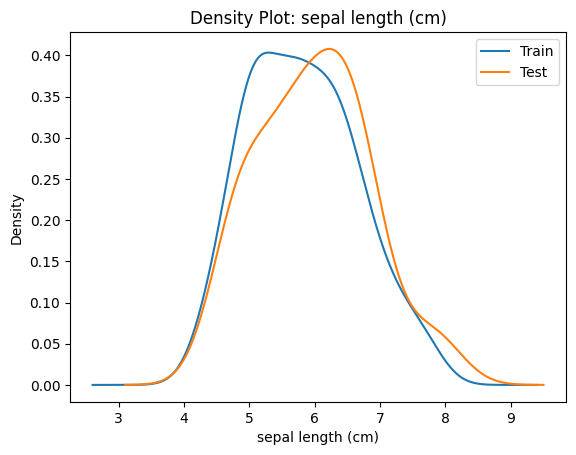

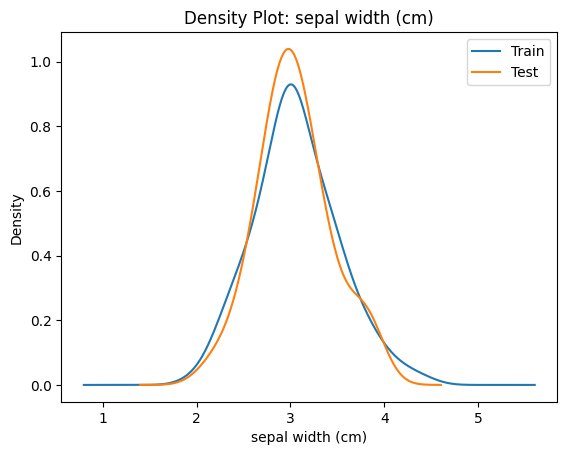

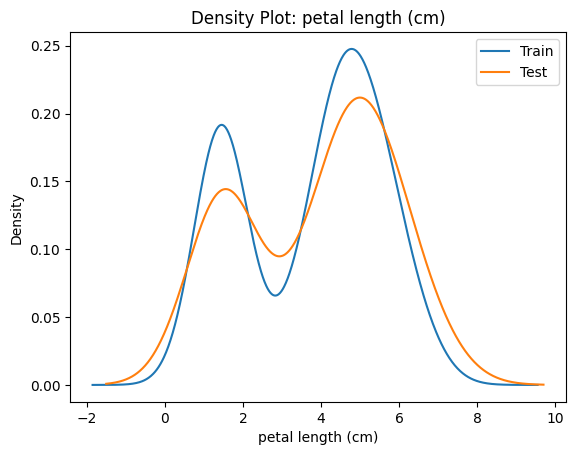

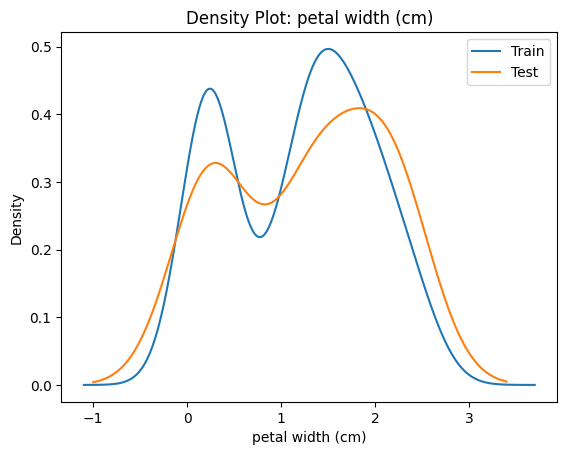

In [53]:
features = feature_names  # e.g. ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for feature in features:
    plt.figure()

    # Plot the density (KDE) for training data
    train_df[feature].plot(kind='kde', label='Train')

    # Plot the density (KDE) for test data
    test_df[feature].plot(kind='kde', label='Test')

    plt.title(f"Density Plot: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


##  ج / گسسته سازی پیوستگی

In [54]:


# Create discrete bins for "sepal length (cm)"
# Example thresholds:
#     short  < 5.0
#     medium 5.0 - 6.0
#     long   > 6.0
combined_df["sepal_length_discrete"] = pd.cut(
    combined_df["sepal length (cm)"],
    bins=[0, 5.0, 6.0, np.inf],
    labels=["short", "medium", "long"]
)

# Display the updated DataFrame (just first 10 rows for brevity)
print(combined_df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.6               3.6                1.0               0.2   
1                5.7               4.4                1.5               0.4   
2                6.7               3.1                4.4               1.4   
3                4.8               3.4                1.6               0.2   
4                4.4               3.2                1.3               0.2   
5                6.3               2.5                5.0               1.9   
6                6.4               3.2                4.5               1.5   
7                5.2               3.5                1.5               0.2   
8                5.0               3.6                1.4               0.2   
9                5.2               4.1                1.5               0.1   

   target dataset sepal_length_discrete  
0       0   train                 short  
1       0   train                medium  
2   

### د/ تحلیل آماری

In [59]:
#  Filter for Setosa (target == 0 or 1 or2)
setosa_df = combined_df[combined_df["target"] == 1] # chose class (0,1,2)

#  Use the describe() method to view statistical properties for numeric columns
setosa_stats = setosa_df.describe()
print(setosa_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.936000          2.770000           4.260000   
std             0.516171          0.313798           0.469911   
min             4.900000          2.000000           3.000000   
25%             5.600000          2.525000           4.000000   
50%             5.900000          2.800000           4.350000   
75%             6.300000          3.000000           4.600000   
max             7.000000          3.400000           5.100000   

       petal width (cm)  target  
count         50.000000    50.0  
mean           1.326000     1.0  
std            0.197753     0.0  
min            1.000000     1.0  
25%            1.200000     1.0  
50%            1.300000     1.0  
75%            1.500000     1.0  
max            1.800000     1.0  
